In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import cv2
import joblib as jb

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
warnings.filterwarnings('ignore')


# Read Datasets

In [2]:
df = pd.read_csv('emnist-balanced-train.csv' , header=None)
char_map = pd.read_csv('emnist-balanced-mapping.txt' , delimiter=' ', header=None , index_col=0 , squeeze=True)

df

# Get Labels

In [3]:
label_dictionary = {}
for index, label in enumerate(char_map):
    label_dictionary[index] = chr(label)

In [4]:
label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

# Split Dataset

In [5]:
X_df = df.iloc[:,1:]
y_df = df.iloc[ : , 0 ]

# Rotate Images

In [6]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [7]:
X_df = np.asarray(X_df)
X_df = np.apply_along_axis(rotate, 1, X_df)

# Test

Target is: W


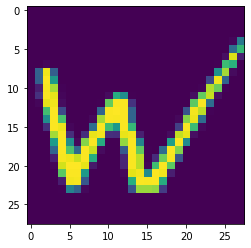

In [8]:
index=3333

print("Target is:" , label_dictionary[(y_df[index])])

plt.imshow(X_df[index])

In [9]:
X_df.shape

(112800, 28, 28)

In [10]:
nsamples, nx, ny = X_df.shape
X_df = X_df.reshape(nsamples,nx*ny)

# Split to Fit

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size= 0.15, random_state=22)

# Decision Tree

In [12]:
DTC = DecisionTreeClassifier(max_depth=35 , min_samples_split=80)
DTC.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=35, min_samples_split=80)

In [13]:
y_predDT = DTC.predict(X_test)

In [14]:
f1_score(y_predDT,y_test , average='weighted')

0.5721943437404822

In [15]:
accuracy_score(y_predDT,y_test)

0.5708037825059101

# Random Forest

In [16]:
RF_model = RandomForestClassifier(n_estimators=350 , criterion='gini',
                                  max_depth=30, min_samples_split=40, 
                                  min_samples_leaf=24, n_jobs= -1)

In [17]:
RF_model.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=24, min_samples_split=40,
                       n_estimators=350, n_jobs=-1)

In [18]:
y_pred = RF_model.predict(X_test)

In [19]:
f1_score(y_pred,y_test , average='weighted')

0.7667775523159202

In [20]:
accuracy_score(y_pred,y_test)

0.7630023640661938

# Visualize 

In [21]:
cf = confusion_matrix(y_test, y_pred)

In [22]:
pd.DataFrame(cf).style.background_gradient(cmap = "inferno")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,239,0,0,0,0,0,1,0,1,0,0,2,0,16,0,0,0,0,0,0,0,0,0,0,89,1,4,0,0,0,3,0,0,0,0,0,2,3,0,0,0,2,0,0,0,0,0
1,0,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,6,0,48,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1
2,0,0,257,1,0,0,0,4,2,0,0,1,0,3,0,0,4,0,0,4,1,1,1,1,0,0,3,5,0,0,0,0,2,0,0,49,6,4,1,0,0,0,0,0,0,0,0
3,0,0,4,312,0,2,0,2,3,0,0,5,0,1,0,0,0,0,0,14,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,1,0,1,1,0,1,3,0,0,0,0,1
4,0,0,0,0,297,0,0,0,0,2,10,0,0,0,0,0,0,4,0,0,0,0,0,4,0,1,0,0,0,0,6,9,0,0,18,0,2,0,4,0,4,0,2,1,5,1,12
5,0,2,0,5,0,267,1,0,2,2,0,3,1,1,1,0,4,0,0,4,1,0,0,0,0,0,0,0,70,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,4,0
6,0,0,0,0,0,0,312,0,0,0,0,0,5,0,3,0,14,0,1,0,0,2,0,0,1,0,0,0,0,0,5,1,3,0,0,0,0,38,1,0,0,0,1,0,0,1,0
7,0,1,0,0,1,0,0,334,0,5,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,3,0,0,0,7,0,0,0,0,2,0,0,0,0,0,1,0,0,3,0,0,7
8,1,2,0,4,0,0,1,0,269,1,0,34,0,3,3,1,0,0,0,0,1,1,0,0,0,4,2,1,0,1,0,2,0,0,1,0,0,0,1,0,4,1,0,0,13,3,2
9,0,0,0,1,3,1,0,8,0,327,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,6,1,0,0,0,0,0,0,4,0,1,0,0,0,1,7,0,0,32,0,0


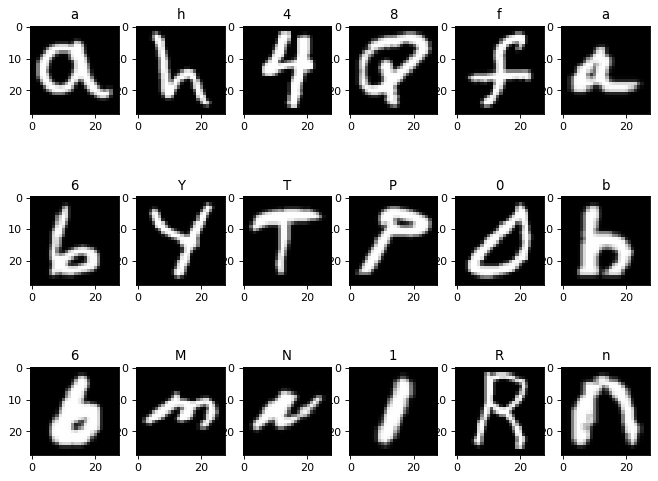

In [23]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(X_test[i].reshape(28, 28) , cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i]])

# Test external sample


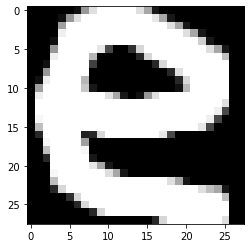

In [25]:
img = cv2.imread('Untitled.png')
plt.imshow(img)

In [26]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [27]:
resized_img = cv2.resize(gray , (28,28) , interpolation = cv2.INTER_AREA)
final_img = resized_img.reshape(-1)

In [28]:
y_pred_samp = RF_model.predict([final_img])

Predicted e


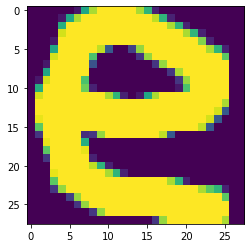

In [29]:
print("Predicted " + label_dictionary[ ( y_pred_samp[0] ) ]  )
im = final_img
im = rotate(im)
im = rotate(im)
plt.imshow(im)

# Saving The Model

In [31]:
jb.dump(RF_model , 'rf_model.sav')

['rf_model.sav']

In [32]:
rrr = jb.load("rf_model.sav")

# Test the saved Model

Predicted e


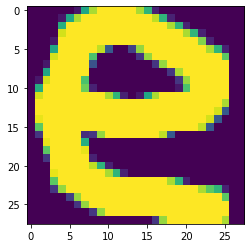

In [33]:
print("Predicted " + label_dictionary[ ( rrr.predict([final_img])[0] ) ]  )
im = final_img
im = rotate(im)
im = rotate(im)
plt.imshow(im)